In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10
import random

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]
print(X_train.shape)

(40000, 32, 32, 3)


In [5]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print(y_train[0]) #initial data
print(Y_train[0]) #one hot encoded data

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32,32,3))) #convolutional layer with 32 kernels, kernel size 3x3, sigmoid activation
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with size 2x2
model.add(Flatten()) #flatten from tensor into vector
model.add(Dense(128, activation='sigmoid')) #fully connected layer with 128 nodes, sigmoid activation for output in the form of a probability value between 0 and 1
model.add(Dense(10, activation='softmax')) #output layer with 10 nodes, softmax function for probability distribution output
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #categorical cross entropy loss; mini-batch gradient descent for optimizing loss function

H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3162 - loss: 1.8781 - val_accuracy: 0.4978 - val_loss: 1.3829
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5479 - loss: 1.2623 - val_accuracy: 0.5709 - val_loss: 1.1930
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6389 - loss: 1.0233 - val_accuracy: 0.6313 - val_loss: 1.0434
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6978 - loss: 0.8670 - val_accuracy: 0.6511 - val_loss: 0.9909
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7555 - loss: 0.7146 - val_accuracy: 0.6549 - val_loss: 0.9940
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8075 - loss: 0.5752 - val_accuracy: 0.6510 - val_loss: 1.0195
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8570 - loss: 0.4540 - val_accuracy: 0.6556 - val_loss: 1.0314
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8981 - loss: 0

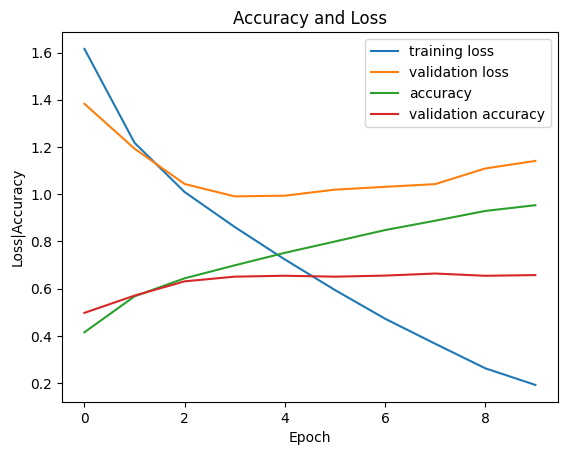

In [8]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [9]:
#evaluate on test set: test loss and test accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[1.1555448770523071, 0.6521999835968018]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted value: 4


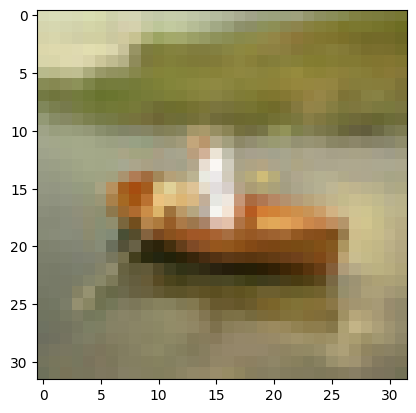

In [11]:
#predict image
sample_no = random.randrange(1, 10000)
plt.imshow(X_test[sample_no].reshape(32,32,3), cmap='gray')
y_predict = model.predict(X_test[sample_no].reshape(1,32,32,3))
print('Predicted value:', np.argmax(y_predict))